In [4]:
import pandas as pd
import numpy as np

In [5]:
delivery = pd.read_csv("C:\MSXL\mlfinalproject\deliveries.csv")
matches = pd.read_csv("C:\MSXL\mlfinalproject\matches.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\suman\AppData\Local\Temp\ipykernel_13212\91225918.py:1: SyntaxWarning: invalid escape sequence '\M'
  delivery = pd.read_csv("C:\MSXL\mlfinalproject\deliveries.csv")
C:\Users\suman\AppData\Local\Temp\ipykernel_13212\91225918.py:2: SyntaxWarning: invalid escape sequence '\M'
  matches = pd.read_csv("C:\MSXL\mlfinalproject\matches.csv")


In [6]:
delivery.tail()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [7]:
matches["season"] = matches["season"].replace({
    '2007/08': '2008',
    '2009/10': '2010',
    '2020/21': '2020'
})

In [8]:
ipl = pd.merge(delivery, matches, on='id')

In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [10]:
ipl.tail()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [11]:
# Define a function to categorize the phases
def assign_phase(over):
    if 0 <= over <= 5:
        return "1"
    elif 6 <= over <= 14:
        return "2"
    elif 15 <= over <= 19:
        return "3"
    else:
        return "Unknown Phase"

# Apply the function to create the 'phase' column
ipl['Power Play Number'] = ipl['over'].apply(assign_phase)

# Display the first few rows to check the result
print(ipl[['over', 'Power Play Number']].head())

   over Power Play Number
0     0                 1
1     0                 1
2     0                 1
3     0                 1
4     0                 1


In [12]:
player_name = "RG Sharma"
player_team = "Mumbai Indians"

In [13]:
ipl_player = ipl[ipl["batter"]==player_name].copy()
ipl_player.tail()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Power Play Number
259468,1426305,2,Mumbai Indians,Lucknow Super Giants,9,5,RG Sharma,KH Pandya,Ishan Kishan,2,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259469,1426305,2,Mumbai Indians,Lucknow Super Giants,9,6,RG Sharma,KH Pandya,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259472,1426305,2,Mumbai Indians,Lucknow Super Giants,10,3,RG Sharma,Ravi Bishnoi,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259473,1426305,2,Mumbai Indians,Lucknow Super Giants,10,4,RG Sharma,Ravi Bishnoi,Ishan Kishan,4,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259474,1426305,2,Mumbai Indians,Lucknow Super Giants,10,5,RG Sharma,Ravi Bishnoi,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2


In [16]:
ipl_player.tail()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Power Play Number
259468,1426305,2,Mumbai Indians,Lucknow Super Giants,9,5,RG Sharma,KH Pandya,Ishan Kishan,2,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259469,1426305,2,Mumbai Indians,Lucknow Super Giants,9,6,RG Sharma,KH Pandya,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259472,1426305,2,Mumbai Indians,Lucknow Super Giants,10,3,RG Sharma,Ravi Bishnoi,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259473,1426305,2,Mumbai Indians,Lucknow Super Giants,10,4,RG Sharma,Ravi Bishnoi,Ishan Kishan,4,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2
259474,1426305,2,Mumbai Indians,Lucknow Super Giants,10,5,RG Sharma,Ravi Bishnoi,Ishan Kishan,0,...,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2


In [17]:
ipl_player.columns

Index(['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2',
       'Power Play Number'],
      dtype='object')

In [18]:
player_runs = ipl_player[['id','batsman_runs','Power Play Number']]
player_runs[player_runs["id"]==335982]

,id,batsman_runs,Power Play Number


In [19]:
# Initialize new columns for storing the sum of runs in each Power Play
player_runs['runs_in_p1'] = 0
player_runs['runs_in_p2'] = 0
player_runs['runs_in_p3'] = 0

# Get the unique match ids
unique_ids = player_runs['id'].unique()



# Iterate over each match id
for match_id in unique_ids:
    # Calculate the sum of runs in each Power Play for the current match id
    runs_in_p1 = player_runs[(player_runs["id"] == match_id) & (player_runs["Power Play Number"] == '1')]["batsman_runs"].sum()
    runs_in_p2 = player_runs[(player_runs["id"] == match_id) & (player_runs["Power Play Number"] == '2')]["batsman_runs"].sum()
    runs_in_p3 = player_runs[(player_runs["id"] == match_id) & (player_runs["Power Play Number"] == '3')]["batsman_runs"].sum()

    # Assign these values to the respective rows in the DataFrame
    player_runs.loc[player_runs["id"] == match_id, 'runs_in_p1'] = runs_in_p1
    player_runs.loc[player_runs["id"] == match_id, 'runs_in_p2'] = runs_in_p2
    player_runs.loc[player_runs["id"] == match_id, 'runs_in_p3'] = runs_in_p3

# Display the DataFrame to verify
print(player_runs.head())


C:\Users\suman\AppData\Local\Temp\ipykernel_13212\2371859753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_runs['runs_in_p1'] = 0
C:\Users\suman\AppData\Local\Temp\ipykernel_13212\2371859753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_runs['runs_in_p2'] = 0
C:\Users\suman\AppData\Local\Temp\ipykernel_13212\2371859753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

          id  batsman_runs Power Play Number  runs_in_p1  runs_in_p2  \
991   335986             0                 2           0           0   
992   335986             0                 2           0           0   
993   335986             0                 2           0           0   
1467  335988             4                 2           0          26   
1468  335988             0                 2           0          26   

      runs_in_p3  
991            0  
992            0  
993            0  
1467          40  
1468          40  


In [20]:
grouped = ipl_player.groupby('id').agg({
    'inning': 'first',                # First inning value (assuming it doesn't change for a match ID)
    'target_runs': 'first',           # Target runs (assuming one value per match)
    'bowling_team': 'first',          # First bowling team value
    'toss_winner': 'first',           # First toss winner value
    'season': 'first',                # First season value
    'city': 'first',                  # First city value
    'player_of_match': 'first',       # First player of match value
    'venue': 'first',                 # First venue value
    'winner': 'first',                # First winner value
    'result': 'first',                # First result value
    'result_margin': 'first'          # First result margin value
})

# Now create or update the final DataFrame with the grouped data
final = grouped.reset_index()

# Display the final DataFrame
print(final.tail())

          id  inning  target_runs           bowling_team  \
246  1426286       1        145.0   Lucknow Super Giants   
247  1426289       2        170.0  Kolkata Knight Riders   
248  1426293       2        174.0    Sunrisers Hyderabad   
249  1426298       2        158.0  Kolkata Knight Riders   
250  1426305       2        215.0   Lucknow Super Giants   

              toss_winner season     city player_of_match  \
246  Lucknow Super Giants   2024  Lucknow      MP Stoinis   
247        Mumbai Indians   2024   Mumbai         VR Iyer   
248        Mumbai Indians   2024   Mumbai        SA Yadav   
249        Mumbai Indians   2024  Kolkata        CV Varun   
250        Mumbai Indians   2024   Mumbai        N Pooran   

                                                 venue                 winner  \
246  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   Lucknow Super Giants   
247                           Wankhede Stadium, Mumbai  Kolkata Knight Riders   
248                          

In [24]:
player_runs[player_runs["id"]==1426310]

,id,batsman_runs,Power Play Number,runs_in_p1,runs_in_p2,runs_in_p3


In [25]:
unique_ids = player_runs['id'].unique()

# Initialize the 'runs_in_p1', 'runs_in_p2', 'runs_in_p3' columns in 'final' DataFrame
final['runs_in_p1'] = 0
final['runs_in_p2'] = 0
final['runs_in_p3'] = 0

# Iterate over each unique match ID
for match_id in unique_ids:
    # Extract the corresponding runs for each Power Play from kohli_runs
    runs_in_p1 = player_runs.loc[player_runs["id"] == match_id, "runs_in_p1"].iloc[0]
    runs_in_p2 = player_runs.loc[player_runs["id"] == match_id, "runs_in_p2"].iloc[0]
    runs_in_p3 = player_runs.loc[player_runs["id"] == match_id, "runs_in_p3"].iloc[0]
    
    # Assign these values to the corresponding rows in the final DataFrame
    final.loc[final["id"] == match_id, 'runs_in_p1'] = runs_in_p1
    final.loc[final["id"] == match_id, 'runs_in_p2'] = runs_in_p2
    final.loc[final["id"] == match_id, 'runs_in_p3'] = runs_in_p3

# Display the updated 'final' DataFrame
print(final.head())

       id  inning  target_runs                 bowling_team       toss_winner  \
0  335986       1        111.0        Kolkata Knight Riders   Deccan Chargers   
1  335988       1        143.0             Delhi Daredevils   Deccan Chargers   
2  335990       1        215.0             Rajasthan Royals  Rajasthan Royals   
3  335999       1        165.0              Kings XI Punjab   Kings XI Punjab   
4  336002       1        166.0  Royal Challengers Bangalore   Deccan Chargers   

  season       city player_of_match  \
0   2008    Kolkata       DJ Hussey   
1   2008  Hyderabad        V Sehwag   
2   2008  Hyderabad       YK Pathan   
3   2008  Hyderabad        SE Marsh   
4   2008  Hyderabad   R Vinay Kumar   

                                       venue                       winner  \
0                               Eden Gardens        Kolkata Knight Riders   
1  Rajiv Gandhi International Stadium, Uppal             Delhi Daredevils   
2  Rajiv Gandhi International Stadium, Uppal   

In [26]:
print(final.tail())


          id  inning  target_runs           bowling_team  \
246  1426286       1        145.0   Lucknow Super Giants   
247  1426289       2        170.0  Kolkata Knight Riders   
248  1426293       2        174.0    Sunrisers Hyderabad   
249  1426298       2        158.0  Kolkata Knight Riders   
250  1426305       2        215.0   Lucknow Super Giants   

              toss_winner season     city player_of_match  \
246  Lucknow Super Giants   2024  Lucknow      MP Stoinis   
247        Mumbai Indians   2024   Mumbai         VR Iyer   
248        Mumbai Indians   2024   Mumbai        SA Yadav   
249        Mumbai Indians   2024  Kolkata        CV Varun   
250        Mumbai Indians   2024   Mumbai        N Pooran   

                                                 venue                 winner  \
246  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   Lucknow Super Giants   
247                           Wankhede Stadium, Mumbai  Kolkata Knight Riders   
248                          

In [27]:
final.columns

Index(['id', 'inning', 'target_runs', 'bowling_team', 'toss_winner', 'season',
       'city', 'player_of_match', 'venue', 'winner', 'result', 'result_margin',
       'runs_in_p1', 'runs_in_p2', 'runs_in_p3'],
      dtype='object')

In [28]:
final.head()

,id,inning,target_runs,bowling_team,toss_winner,season,city,player_of_match,venue,winner,result,result_margin,runs_in_p1,runs_in_p2,runs_in_p3
0,335986,1,111.0,Kolkata Knight Riders,Deccan Chargers,2008,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,wickets,5.0,0,0,0
1,335988,1,143.0,Delhi Daredevils,Deccan Chargers,2008,Hyderabad,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Delhi Daredevils,wickets,9.0,0,26,40
2,335990,1,215.0,Rajasthan Royals,Rajasthan Royals,2008,Hyderabad,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Rajasthan Royals,wickets,3.0,0,19,17
3,335999,1,165.0,Kings XI Punjab,Kings XI Punjab,2008,Hyderabad,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",Kings XI Punjab,wickets,7.0,0,30,46
4,336002,1,166.0,Royal Challengers Bangalore,Deccan Chargers,2008,Hyderabad,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,wickets,5.0,0,17,0


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame called final

# 1. One-hot encoding for 'bowling_team' using sklearn's OneHotEncoder
encoder_team = OneHotEncoder(drop='first', sparse_output=False)
encoded_teams = encoder_team.fit_transform(final[['bowling_team']])

# Create DataFrame for encoded teams
team_df = pd.DataFrame(encoded_teams, columns=encoder_team.get_feature_names_out(['bowling_team']))

# 2. One-hot encoding for 'city' using sklearn's OneHotEncoder
encoder_city = OneHotEncoder(drop='first', sparse_output=False)
encoded_city = encoder_city.fit_transform(final[['city']])

# Create DataFrame for encoded city
city_df = pd.DataFrame(encoded_city, columns=encoder_city.get_feature_names_out(['city']))

# 3. Concatenate the encoded columns back to the original DataFrame
final = pd.concat([final, team_df, city_df], axis=1)

# 4. Drop the original 'bowling_team' and 'city' columns
final.drop(columns=['bowling_team', 'city'], inplace=True)

# 5. Binary column for 'toss_winner' if it matches 'player_team'
final['toss_winner_is_player_team'] = (final['toss_winner'] == player_team).astype(int)

# Create a mapping dictionary for seasons starting from 2008 to 2024
season_mapping = {str(year): idx + 1 for idx, year in enumerate(range(2008, 2025))}

# Apply the mapping to the 'season' column
final['season_mapped'] = final['season'].map(season_mapping)


# 7. Binary column for 'player_of_match' if it matches 'player_name'
final['player_of_match_is_player'] = (final['player_of_match'] == player_name).astype(int)

# 8. Binary column for 'winner' if it matches 'player_team'
final['winner_is_player_team'] = (final['winner'] == player_team).astype(int)

# 9. Drop the 'result' and 'result_margin' columns as they are not needed
final.drop(columns=['result', 'result_margin'], inplace=True)

# Display the final DataFrame
print(final.head())


       id  inning  target_runs       toss_winner season player_of_match  \
0  335986       1        111.0   Deccan Chargers   2008       DJ Hussey   
1  335988       1        143.0   Deccan Chargers   2008        V Sehwag   
2  335990       1        215.0  Rajasthan Royals   2008       YK Pathan   
3  335999       1        165.0   Kings XI Punjab   2008        SE Marsh   
4  336002       1        166.0   Deccan Chargers   2008   R Vinay Kumar   

                                       venue                       winner  \
0                               Eden Gardens        Kolkata Knight Riders   
1  Rajiv Gandhi International Stadium, Uppal             Delhi Daredevils   
2  Rajiv Gandhi International Stadium, Uppal             Rajasthan Royals   
3  Rajiv Gandhi International Stadium, Uppal              Kings XI Punjab   
4  Rajiv Gandhi International Stadium, Uppal  Royal Challengers Bangalore   

   runs_in_p1  runs_in_p2  ...  city_Port Elizabeth  city_Pune  city_Rajkot  \
0      

In [30]:
final.tail()

,id,inning,target_runs,toss_winner,season,player_of_match,venue,winner,runs_in_p1,runs_in_p2,...,city_Port Elizabeth,city_Pune,city_Rajkot,city_Sharjah,city_Visakhapatnam,city_None,toss_winner_is_player_team,season_mapped,player_of_match_is_player,winner_is_player_team
246,1426286,1,145.0,Lucknow Super Giants,2024,MP Stoinis,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,17,0,0
247,1426289,2,170.0,Mumbai Indians,2024,VR Iyer,"Wankhede Stadium, Mumbai",Kolkata Knight Riders,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,17,0,0
248,1426293,2,174.0,Mumbai Indians,2024,SA Yadav,"Wankhede Stadium, Mumbai",Mumbai Indians,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,17,0,1
249,1426298,2,158.0,Mumbai Indians,2024,CV Varun,"Eden Gardens, Kolkata",Kolkata Knight Riders,17,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1,17,0,0
250,1426305,2,215.0,Mumbai Indians,2024,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,39,29,...,0.0,0.0,0.0,0.0,0.0,0.0,1,17,0,0


In [31]:
final.drop(columns=["id","toss_winner","season","venue","player_of_match","winner"], inplace=True)

In [32]:
final.columns

Index(['inning', 'target_runs', 'runs_in_p1', 'runs_in_p2', 'runs_in_p3',
       'bowling_team_Deccan Chargers', 'bowling_team_Delhi Capitals',
       'bowling_team_Delhi Daredevils', 'bowling_team_Gujarat Lions',
       'bowling_team_Gujarat Titans', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders',
       'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians',
       'bowling_team_Pune Warriors', 'bowling_team_Punjab Kings',
       'bowling_team_Rajasthan Royals', 'bowling_team_Rising Pune Supergiant',
       'bowling_team_Rising Pune Supergiants',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Royal Challengers Bengaluru',
       'bowling_team_Sunrisers Hyderabad', 'city_Ahmedabad', 'city_Bangalore',
       'city_Bengaluru', 'city_Cape Town', 'city_Centurion', 'city_Chandigarh',
       'city_Chennai', 'city_Cuttack', 'city_Delhi', 'city_Dharamsala',
       'city_Dubai', 'city_Durban', 'city_East London', 'city_Hyderabad

In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   inning                                    251 non-null    int64  
 1   target_runs                               251 non-null    float64
 2   runs_in_p1                                251 non-null    int64  
 3   runs_in_p2                                251 non-null    int64  
 4   runs_in_p3                                251 non-null    int64  
 5   bowling_team_Deccan Chargers              251 non-null    float64
 6   bowling_team_Delhi Capitals               251 non-null    float64
 7   bowling_team_Delhi Daredevils             251 non-null    float64
 8   bowling_team_Gujarat Lions                251 non-null    float64
 9   bowling_team_Gujarat Titans               251 non-null    float64
 10  bowling_team_Kings XI Punjab          

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler for 'target_runs' column only
scaler = StandardScaler()
# Fit and transform the 'target_runs' column
final['target_runs_scaled'] = scaler.fit_transform(final[['target_runs']])

# Drop the original 'target_runs' column (optional, if you only want the scaled version)
final.drop(columns=['target_runs'], inplace=True)


In [35]:
# Separate the training and testing datasets
train = final[final['season_mapped'] != 17]
test = final[final['season_mapped'] == 17]

# Display the shapes of the training and testing datasets
print(f"Shape of training set: {train.shape}")
print(f"Shape of testing set: {test.shape}")


Shape of training set: (237, 57)
Shape of testing set: (14, 57)


In [36]:


# Separate X (features) and y (target variables)
X_train = train.drop(columns=['runs_in_p1', 'runs_in_p2', 'runs_in_p3'])
y_train = train[['runs_in_p1', 'runs_in_p2', 'runs_in_p3']]
X_test = test.drop(columns=['runs_in_p1', 'runs_in_p2', 'runs_in_p3'])
y_test = test[['runs_in_p1', 'runs_in_p2', 'runs_in_p3']]


In [37]:
X_train[X_train["season_mapped"]==16]

,inning,bowling_team_Deccan Chargers,bowling_team_Delhi Capitals,bowling_team_Delhi Daredevils,bowling_team_Gujarat Lions,bowling_team_Gujarat Titans,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Lucknow Super Giants,bowling_team_Mumbai Indians,...,city_Pune,city_Rajkot,city_Sharjah,city_Visakhapatnam,city_None,toss_winner_is_player_team,season_mapped,player_of_match_is_player,winner_is_player_team,target_runs_scaled
221,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,16,0,0,0.139077
222,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,16,0,0,-0.328594
223,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,16,1,1,0.172482
224,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,16,0,1,0.606749
225,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,16,0,1,0.840584
226,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,16,0,0,1.575497
227,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,16,0,0,1.341661
228,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,16,0,1,1.508686
229,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,16,0,1,1.575497
230,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,16,0,0,-0.929886


In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Step 3: Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Set parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',             # Evaluation metric
    'learning_rate': 0.1,               # Step size shrinkage
    'max_depth': 6,                     # Maximum depth of a tree
    'alpha': 10,                        # L1 regularization term
    'n_estimators': 100                 # Number of boosting rounds
}

# Step 5: Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Step 6: Make predictions on the test set
y_pred = model.predict(dtest)

# Step 7: Calculate RMSE for the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE on test set: {rmse}")

RMSE on test set: 12.192682801233545


C:\Users\suman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:52:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\suman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


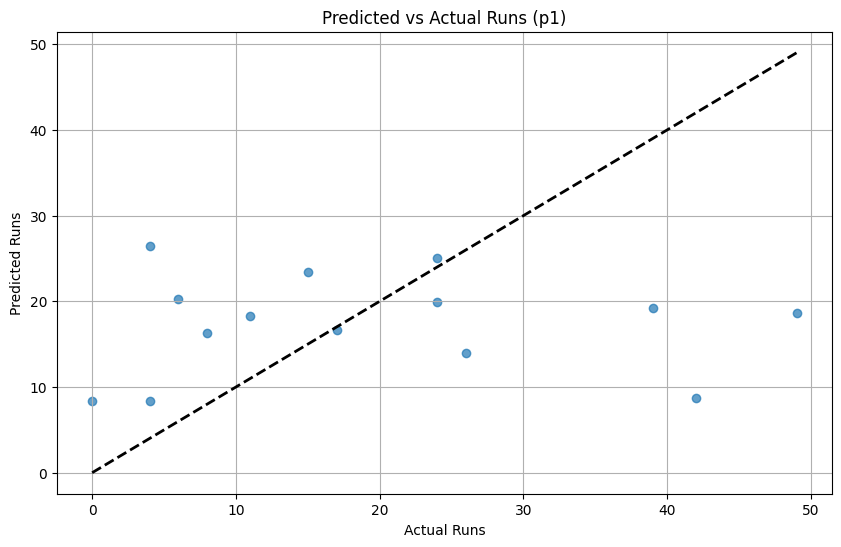

In [39]:
import matplotlib.pyplot as plt

# Assuming y_test is in a DataFrame and has three columns: runs_in_p1, runs_in_p2, runs_in_p3
# For the sake of this example, let's assume we are focusing on the first target variable (runs_in_p1)

# Extract the first column of y_test for actual values
actual_values = y_test['runs_in_p1'].values
predicted_values = y_pred[:, 0]  # Get predictions for runs_in_p1

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)  # Diagonal line
plt.title('Predicted vs Actual Runs (p1)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.grid()
plt.show()


In [40]:
# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({
    'Actual Runs in p1': y_test['runs_in_p1'].values,
    'Predicted Runs in p1': y_pred[:, 0],  # Predictions for runs_in_p1
    'Actual Runs in p2': y_test['runs_in_p2'].values,
    'Predicted Runs in p2': y_pred[:, 1],  # Predictions for runs_in_p2
    'Actual Runs in p3': y_test['runs_in_p3'].values,
    'Predicted Runs in p3': y_pred[:, 2]   # Predictions for runs_in_p3
})

# Display the results
print(results)


    Actual Runs in p1  Predicted Runs in p1  Actual Runs in p2  \
0                  24             19.899063                 19   
1                  26             13.971137                  0   
2                   0              8.328883                  0   
3                  49             18.606398                  0   
4                  15             23.423985                 23   
5                  42              8.750381                 35   
6                  24             25.061123                 12   
7                   6             20.258293                  0   
8                   8             16.307907                  0   
9                   4              8.364809                  0   
10                 11             18.248232                  0   
11                  4             26.442965                  0   
12                 17             16.674057                  2   
13                 39             19.229416                 29   

    Predi